Cones in the shadow of retinal blood vessels
--------------------------------------------

The retinal vasculature sits above the cone mosaic, which means that some cones lie in the shadow of retinal blood vessels. These so-called 'penumbral' cones have altered spectral sensitivity functions due to the prereceptoral filtering of light by blood. [Spitschan et al., (2015)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0124328) were able to 

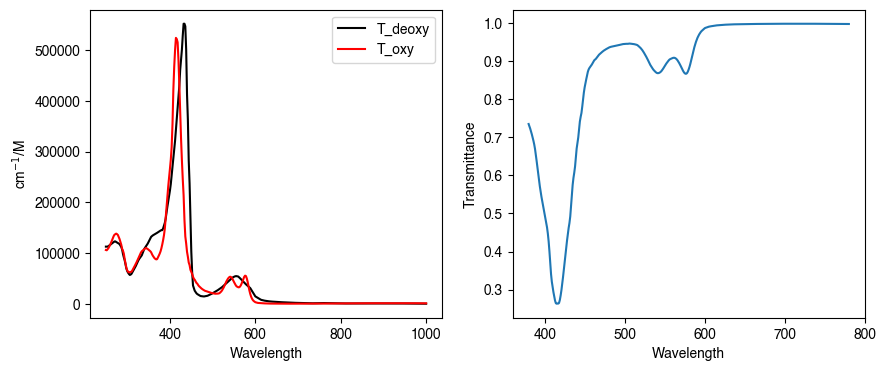

In [1]:
import matplotlib.pyplot as plt

from pysilsub.precep import get_hemoglobin_transmittance, get_hemoglobin_absorptances

hgb = get_hemoglobin_absorptances()

hgb_transmittance = get_hemoglobin_transmittance(
    wavelengths=(380, 781, 1),
    vessel_oxygenation_fraction=.85,
    vessel_overall_thickness_um=5
)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

hgb.plot(ax=axs[0], color=['black', 'red'], ylabel='cm$^{-1}$/M')
hgb_transmittance.plot(ax=axs[1], ylabel='Transmittance');




With the transmission spectrum we can create spectral sensitivity functions for penumbral cones.

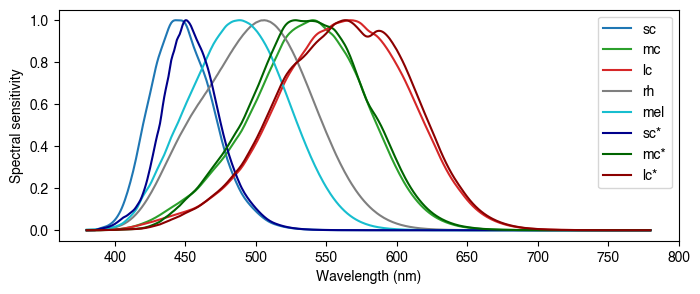

In [3]:
from pysilsub import observers


observer = observers.IndividualColorimetricObserver(age=20, field_size=10)

penumbral_cones = observer.action_spectra[['sc', 'mc', 'lc']].mul(hgb_transmittance, axis=0)
penumbral_cones = penumbral_cones / penumbral_cones.max()
penumbral_cones.columns = [receptor + '*' for receptor in penumbral_cones.columns]

# Override list of photoreceptors and colors used for plotting
observer.action_spectra = observer.action_spectra.join(penumbral_cones)
observer.photoreceptors = observer.action_spectra.columns.tolist()
observer.photoreceptor_colors = {
    "sc": "tab:blue",
    "mel": "tab:cyan",
    "rh": "tab:grey",
    "mc": "tab:green",
    "lc": "tab:red",
    "sc*": "darkblue",
    "mc*": "darkgreen",
    "lc*": "darkred",

       
}

# Plot action spectra
observer.plot_action_spectra(figsize=(8, 3));

In [162]:
from pysilsub import problems 

ssp = problems.SilentSubstitutionProblem.from_package_data('OneLight')
ssp.calibration = ssp.calibration.reindex(range(380, 781, 1), axis=1).interpolate('linear', axis=1)
ssp.calibration_wavelengths = (380, 781, 1)

ssp.observer = observer
ssp.ignore = ['rh', 'mel']
ssp.minimize = ['sc', 'mc', 'lc', 'sc*']
ssp.modulate = ['mc*', 'lc*']
ssp.target_contrast = .012
ssp.background = [.5] * ssp.nprimaries
ssp.print_problem()

************************************************************
*************** Silent Substitution Problem ****************
************************************************************
Device: OneLight
Observer: IndividualColorimetricObserver(age=20, field_size=10)
Ignoring: ['rh', 'mel']
Minimising: ['sc', 'mc', 'lc', 'sc*']
Modulating: ['mc*', 'lc*']
Target contrast: [ 0.012  0.012]
Background: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]




<AxesSubplot: title={'center': 'OneLight SPDs'}, xlabel='Wavelength (nm)', ylabel='W/$m^2$/s/nm'>

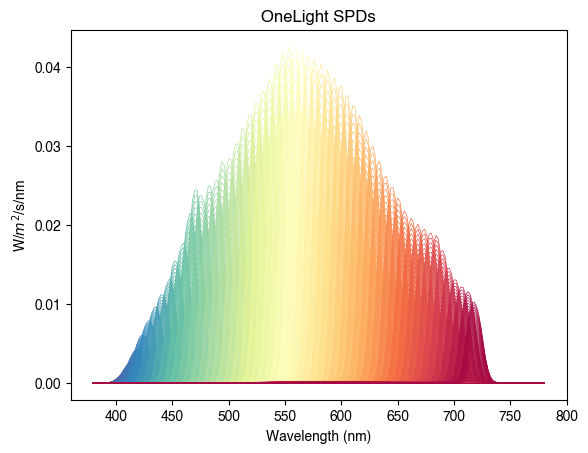

In [120]:
ssp.plot_calibration_spds(legend=False)

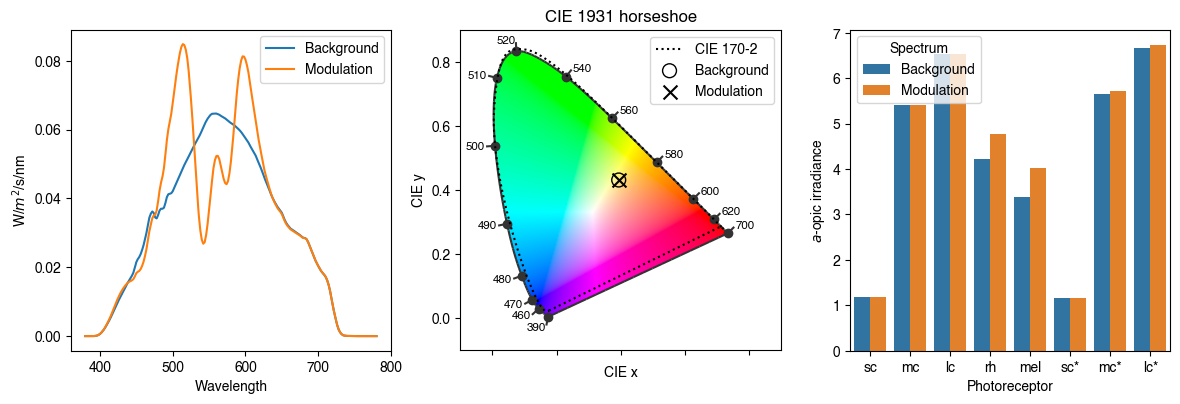

In [163]:
solution = ssp.linalg_solve()
_ = ssp.plot_solution(solution)

In [164]:
ssp.print_photoreceptor_contrasts(solution)

sc     0.000000
mc     0.000000
lc     0.000000
rh     0.132800
mel    0.190779
sc*    0.000000
mc*    0.012000
lc*    0.012000
dtype: float64
